In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Import & Preprocess Dataset
After downloading from Kaggle, name it Housing.csv or change filename below.

In [71]:
df = pd.read_csv("E:\projects\ML\elevate lab\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Handle Missing Values (if any)
Convert categorical → numeric (if present)

In [72]:
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

Fit Linear Regression Model
This project demonstrates how to run either Simple Linear Regression or Multiple Linear Regression using Python.

1. Simple Linear Regression

Simple Linear Regression is used when you have:
--One input feature (X) --example:area
--One target variable (y)

In [73]:
feature = "area"   # you can change to bedrooms, bathrooms, etc.

X_simple = df[[feature]]
y_simple = df["price"]


Train-Test Split

In [74]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)


In [75]:
# Train Simple Regression Model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


plot regression line

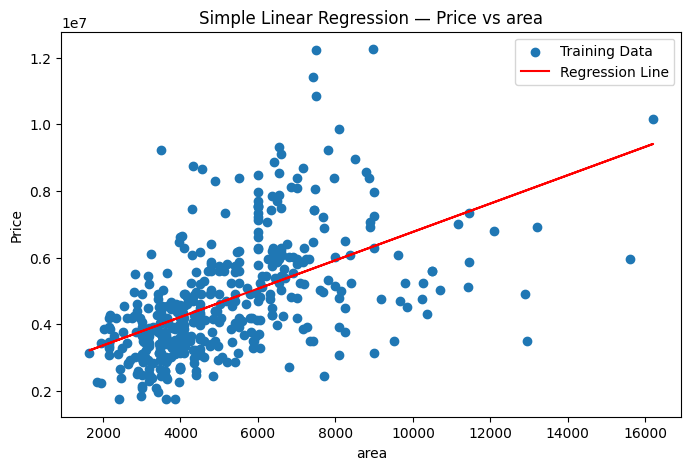

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train_s, y_train_s, label="Training Data")
plt.plot(X_train_s, model_simple.predict(X_train_s), color="red", label="Regression Line")

plt.xlabel(feature)
plt.ylabel("Price")
plt.title("Simple Linear Regression — Price vs " + feature)
plt.legend()
plt.show()


Print Simple Model Coefficients

In [77]:
print("Simple Linear Regression Coefficient:", model_simple.coef_[0])
print("Intercept:", model_simple.intercept_)


Simple Linear Regression Coefficient: 425.72984193878284
Intercept: 2512254.2639593435


2. Multiple Linear Regression

Multiple Linear Regression is used when you have:
--Two or more input features (X1, X2, X3, …)
--one target variable (y)

Split Data

In [78]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


train model

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
# Train Multiple Regression Model
epochs = 1000
for epoch in range(epochs):
    model.fit(X_train, y_train)


prediction &
evaluate model

In [80]:
y_pred = model.predict(X_test)


mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("MULTIPLE LINEAR REGRESSION RESULTS")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R² Score:", r2)



MULTIPLE LINEAR REGRESSION RESULTS
MAE  : 970043.403920164
MSE  : 1754318687330.6643
RMSE : 1324506.9600914388
R² Score: 0.6529242642153184


Coefficient Interpretation

In [81]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nMODEL COEFFICIENTS:")
print(coeff_df)
print("\nIntercept:", model.intercept_)



MODEL COEFFICIENTS:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05

Intercept: 260032.35760741495


Correlation Heatmap (optional visualization)

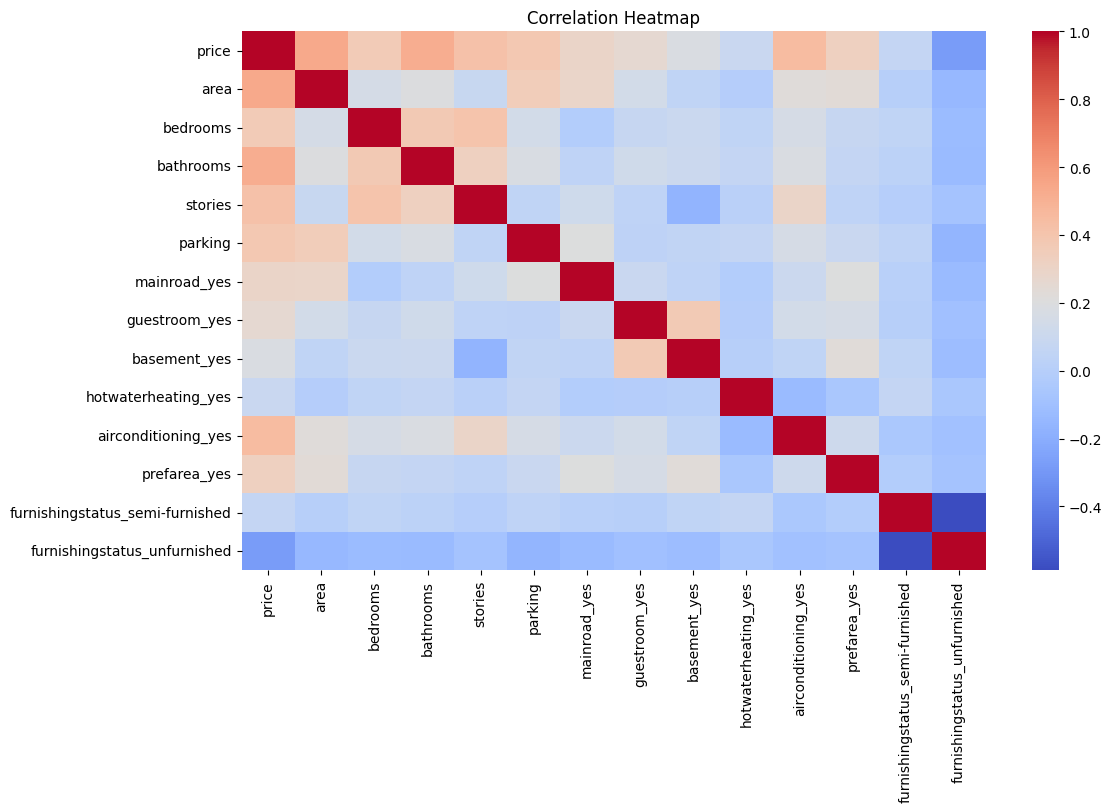

In [82]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
